# 分类：简单的数字识别（一）
### Classification: Simple Handwritten Digit Recognition Ⅰ

## 1 加载数据
Load the Data：using sklearn's handwritten digit datasets

In [2]:
from sklearn import datasets
digits=datasets.load_digits()

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


## 2 查看数据
Take a Quick Look at the Data

In [4]:
X=digits.data
y=digits.target
print(X.shape)

(1797, 64)


In [5]:
import pandas as pd
X_df=pd.DataFrame(X)
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


可以猜测这个数据集是采用8x8像素点来表述的，总共有1797行

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

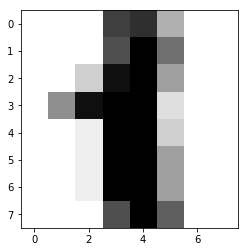

In [7]:
sample_digit_image=X[1].reshape(8,8)
plt.imshow(sample_digit_image,cmap = matplotlib.cm.binary,interpolation="nearest")

这个看起来很像是1？

In [26]:
y[1]

1

它确实是。

## 3 准备训练集和测试集
Prepare the Training Set and the Test Set

In [9]:
test_ratio=0.2
test_size=int(len(X)*test_ratio)

In [10]:
test_size

359

此处可以观察一下Y，发现本身就是打乱的，不是按照顺序出现，所以可以直接对数据级进行划分。（虽然前面部分是从0~9循环的。）

In [11]:
y[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [12]:
X_test,X_train=X[:test_size],X[test_size:]
y_test,y_train=y[:test_size],y[test_size:]

In [13]:
import numpy as np
np.random.seed(50)

shuffle_index=np.random.permutation(len(X)-test_size)

In [14]:
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

## 4 训练二分类器
Train a Binary Classifier

In [15]:
y_test_1=(y_test==1)
y_train_1=(y_train==1)

In [16]:
import warnings
warnings.filterwarnings("ignore")

1）试试SGD

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=22)
sgd_clf.fit(X_train,y_train_1)

sgd_result=sgd_clf.predict(X_test)
sgd_wrong=sum(sgd_result!=y_test_1)
print(sgd_wrong/len(y_test_1))

0.04456824512534819


2）试试决策树

In [18]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train_1)

dt_result=dt_clf.predict(X_test)
dt_wrong=sum(dt_result!=y_test_1)
print(dt_wrong/len(y_test_1))

0.07242339832869081


## 5 评估模型性能
Performance Measures

1）使用交叉验证： cross_val_score()， cross_val_predict()

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_1,cv=3,scoring="accuracy")

array([0.95833333, 0.97077244, 0.96868476])

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_1,cv=3)
y_train_predict.shape

(1438,)

cross_val_predict()返回的是预测值的数组；1438刚好是训练集的数据长度

2）分类问题可用混淆矩阵（Confusion Matrix）进行性能评估

     true negatives(TN) | false positives(FP)           准确率：precision = TP / (TP + FP)
    —————————————————————  
    false negatives(FN) | true positives(TP)            召回率：recall = TP / (TP + FN) ,又称真正例率（True Positive Rate）
    
    准确率和召回率越高则分类器准确度越高。
    
    真反例率（True Negative Rate）：TNR = TN / (TN + FP)
    
    假正例率（False Positive Rate）：FPR = FP / (TN + FP) = 1 - TNR
    

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1,y_train_predict)

array([[1288,    6],
       [  43,  101]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_1,y_train_predict))
print(recall_score(y_train_1,y_train_predict))

0.9439252336448598
0.7013888888888888


In [102]:
print(101/(101+6))
print(101/(101+43))
print(1288/(1288+6))

0.9439252336448598
0.7013888888888888
0.9953632148377125


3）综合考虑准确率和召回率：选择折衷的方案？

    precision和recall: F1=2/((1/precision)+(1/recall))。
    
    根据实际项目需求追求其中的一种，诸如防盗警报，更倾向于追求召回率。（即是有时候会受到错误的警报，但是只要有盗贼的情况都会报警。）
    
    决策阈值的调整：SGD根据决策函数计算出的每个样本的分数，以此来判断正误。

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_1,y_train_predict)

0.8047808764940239

In [39]:
score_1=sgd_clf.decision_function(X[:50])
pd.DataFrame(score_1.reshape(5,10))

,0,1,2,3,4,5,6,7,8,9
0,-17550.395410,3669.533764,-2249.381855,-8919.304922,-6481.888876,-2489.948469,-7359.895959,-11036.779584,-11626.595190,-6967.906705
1,-13410.695813,2057.615336,-3757.502505,-12957.649043,-9682.523875,-11513.028210,-8295.297107,-13374.061303,-3077.321774,-1908.680915
2,-11259.028942,1491.001586,-5003.075835,-16401.292955,-3255.609722,-10653.338382,-10505.579193,-14907.826109,-7044.839176,-3996.847968
3,-22017.363293,-2516.813776,-15447.574552,-9941.407743,-8228.133839,-9143.996582,-13317.888388,-8427.181342,-8931.516426,-7153.521554
4,-6188.812799,-9661.764319,2752.449871,-10775.453414,-15779.727440,-8645.767250,-3449.772623,4548.761997,-13432.676518,-11506.922458


我们前面已经看了y的前50行，前30行是0~9按顺序来的，在后面还有2个“1”。为了我们看的方便，我们把算出来的分数用dataframe展示，可见所有1的位置都是正数，非1的都是负数。

In [40]:
scores=cross_val_predict(sgd_clf,X_train,y_train_1,cv=3,method="decision_function")

In [44]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds=precision_recall_curve(y_train_1,scores)

sklearn.metrics.precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

Returns:

    precision : array, shape = [n_thresholds + 1]
    Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

    recall : array, shape = [n_thresholds + 1]
    Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

    thresholds : array, shape = [n_thresholds <= len(np.unique(probas_pred))]
    Increasing thresholds on the decision function used to compute precision and recall.

In [54]:
print(thresholds.shape)
print(precision.shape)
print(recall.shape)

(302,)
(303,)
(303,)


(0, 1)

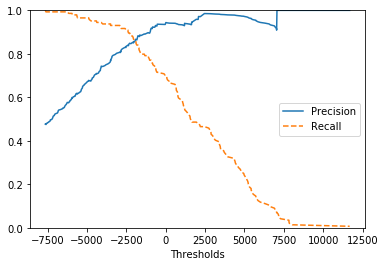

In [66]:
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],"--",label="Recall")
plt.legend(loc="center right")
plt.xlabel("Thresholds")
plt.ylim([0,1])

由上图可见，召回率在阈值很低时才逐渐逼近1，说明SGD给一些数字“1”的样本的评分比较低；而准确率先升后降，说明有一部分“非1”的样本也得到了较高的分数，在阈值逐渐提升的过程，虽然判定正确的样本里面是“很纯的1”，一部分“1”也被被判定为错误。

我们也可以从图中了解到，当我们取两条线的交点处的阈值（大约是-1500）时，准确率和召回率都可以在一个比较高的水平，我们不妨来试一下。

而我们原来（0.944,0.701）是在（阈值=0）的情况下获得的。

In [74]:
tradeoff=(scores>-1500)
print(precision_score(y_train_1,tradeoff))
print(recall_score(y_train_1,tradeoff))

0.8914728682170543
0.7986111111111112


[0, 1, 0, 1]

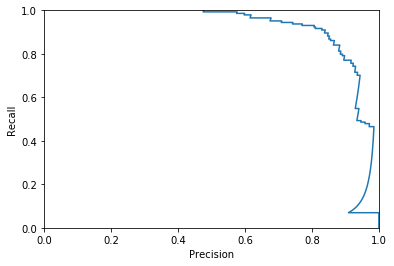

In [70]:
plt.plot(precision,recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0,1,0,1])

4）ROC曲线

    召回率（真正例率）/ 假正例率

In [79]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_1,scores)

Text(0, 0.5, 'True Positive Rate')

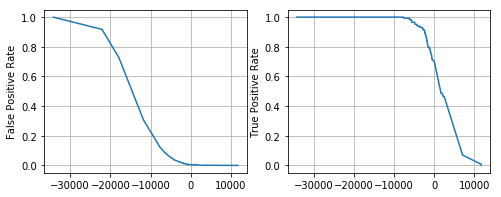

In [119]:
fig,axs=plt.subplots(1,2,figsize=(8,3))
axs[0].plot(thresholds,fpr)
axs[0].grid(True)
axs[0].set_ylabel("False Positive Rate")
axs[1].plot(thresholds,tpr)
axs[1].grid(True)
axs[1].set_ylabel("True Positive Rate")

[0, 1, 0, 1]

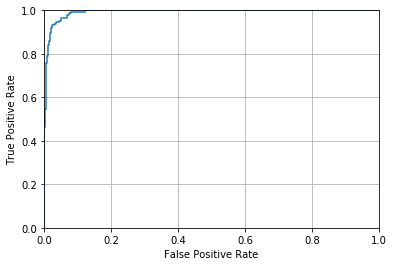

In [114]:
plt.plot(fpr,tpr)
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.axis([0, 1, 0, 1])

可以理解为：随着阈值下降，召回率不断提高，而假的正例“掺杂”进来了。

In [116]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_1, scores)

0.9914884939034861